<a href="https://colab.research.google.com/github/SRIVIDHYA-1610/AI-projects/blob/main/Copy_of_lst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of X: (1, 19), Shape of Y: (1,)
Adjusted Shape of X: (19, 1), Shape of Y: (19,)
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 - 1s - 1s/step - loss: 0.2373
Epoch 2/50
1/1 - 0s - 26ms/step - loss: 0.2330
Epoch 3/50
1/1 - 0s - 25ms/step - loss: 0.2288
Epoch 4/50
1/1 - 0s - 26ms/step - loss: 0.2246
Epoch 5/50
1/1 - 0s - 26ms/step - loss: 0.2204
Epoch 6/50
1/1 - 0s - 25ms/step - loss: 0.2163
Epoch 7/50
1/1 - 0s - 60ms/step - loss: 0.2122
Epoch 8/50
1/1 - 0s - 24ms/step - loss: 0.2081
Epoch 9/50
1/1 - 0s - 25ms/step - loss: 0.2041
Epoch 10/50
1/1 - 0s - 26ms/step - loss: 0.2002
Epoch 11/50
1/1 - 0s - 24ms/step - loss: 0.1962
Epoch 12/50
1/1 - 0s - 29ms/step - loss: 0.1924
Epoch 13/50
1/1 - 0s - 31ms/step - loss: 0.1885
Epoch 14/50
1/1 - 0s - 54ms/step - loss: 0.1847
Epoch 15/50
1/1 - 0s - 39ms/step - loss: 0.1810
Epoch 16/50
1/1 - 0s - 25ms/step - loss: 0.1772
Epoch 17/50
1/1 - 0s - 26ms/step - loss: 0.1736
Epoch 18/50
1/1 - 0s - 27ms/step - loss: 0.1699
Epoch 19/50
1/1 - 0s - 27ms/step - loss: 0.1663
Epoch 20/50
1/1 - 0s - 57ms/step - loss: 0.1628
Epoch 21/50
1/1 - 0s - 59ms/step - loss: 0.1593
Epoch 22/50
1/

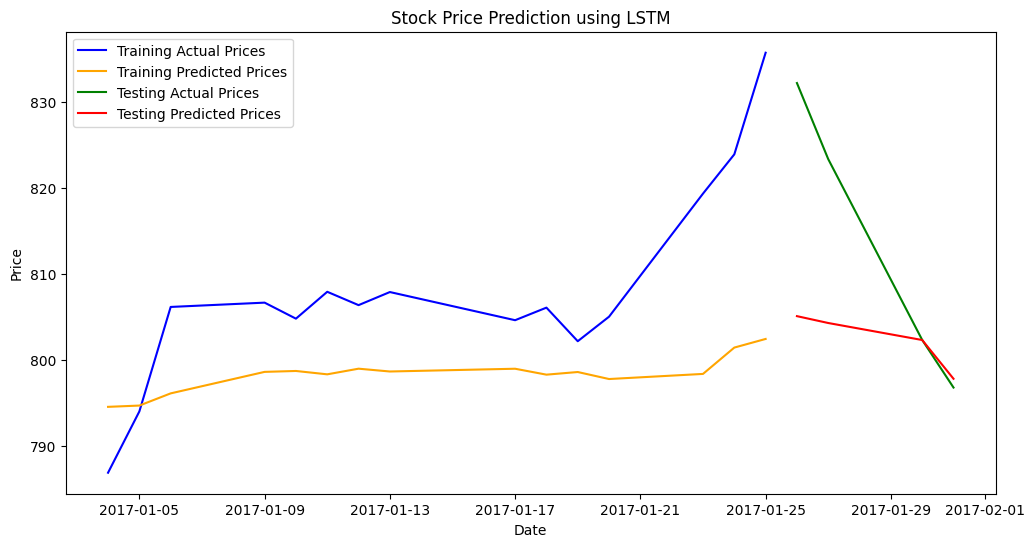

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('/content/Google_Stock_Price_Test (1).csv')

# Preprocessing
data['Volume'] = data['Volume'].str.replace(',', '').astype(float)  # Clean the 'Volume' column
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' column to datetime
data.set_index('Date', inplace=True)  # Set 'Date' as the index

# Select the 'Close' column for prediction
prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Prepare the data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Dynamically adjust the look-back value if necessary
max_look_back = 60
look_back = min(max_look_back, len(scaled_prices) - 1)  # Ensure at least 1 sample
X, Y = create_dataset(scaled_prices, look_back)

# Debugging: Print the shapes of X and Y
print(f"Shape of X: {X.shape}, Shape of Y: {Y.shape}")

# If insufficient data, raise a warning
if X.shape[0] < 10:
    print("Warning: Dataset is too small for meaningful training. Consider using more data.")
    look_back = 1
    X, Y = create_dataset(scaled_prices, look_back)
    print(f"Adjusted Shape of X: {X.shape}, Shape of Y: {Y.shape}")

# Reshape the data to [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

# Adjust batch size if the dataset is small
batch_size = min(32, len(X_train))

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(look_back, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=batch_size, verbose=2)

# Predict the stock prices
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
Y_train = scaler.inverse_transform([Y_train]).reshape(-1, 1)
Y_test = scaler.inverse_transform([Y_test]).reshape(-1, 1)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[look_back:split + look_back], Y_train, label='Training Actual Prices', color='blue')
plt.plot(data.index[look_back:split + look_back], train_predictions, label='Training Predicted Prices', color='orange')
plt.plot(data.index[split + look_back:], Y_test, label='Testing Actual Prices', color='green')
plt.plot(data.index[split + look_back:], test_predictions, label='Testing Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()
